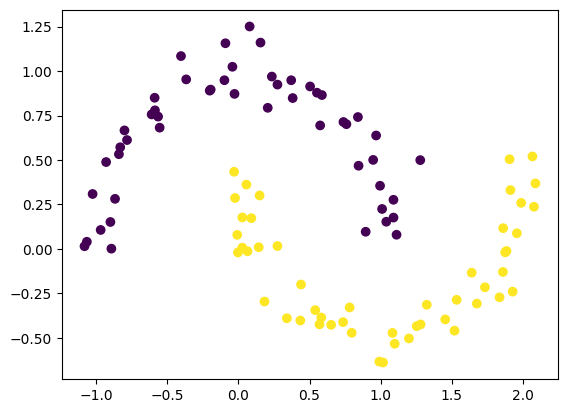

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, ytrue = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=123432)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=ytrue)


In [2]:
from micrograd.nn import MLP
import random
random.seed = 1223332
n = MLP(2, [16, 16, 1])
len(n.parameters())

337

In [3]:
def loss(ypred, ytrue):
    size = len(ypred)
    return sum((ypred[i] - ytrue[i])**2 for i in range(size)) / size

def sol(ypred):
    if ypred.data > -0.5 and ypred.data < 0.5:
        return 0
    return 1

def accurency(ypred, ytrue):
    size = len(ypred)
    return sum(1 if sol(ypred[i]) == ytrue[i] else 0 for i in range(size)) * 100 / size

In [13]:
for _ in range(100):
    # forward pass
    ypred = list(n(x) for x in X)
    out = loss(ypred, ytrue)
    print(out)
    # backpropagation (calculate gradian)
    n.zero_grad()
    out.backward()
    
    # update parameters
    h = -0.03
    for p in n.parameters():
        p.data += p.grad * h
    print(accurency(ypred, ytrue))

Value(data=0.01974384829700578, grad=0)
100.0
Value(data=0.019643906040395596, grad=0)
100.0
Value(data=0.019537701238373128, grad=0)
100.0
Value(data=0.019424156694911366, grad=0)
100.0
Value(data=0.019312814387711263, grad=0)
100.0
Value(data=0.01920318278403911, grad=0)
100.0
Value(data=0.01907121660314846, grad=0)
100.0
Value(data=0.018910410049136298, grad=0)
100.0
Value(data=0.018735598366025764, grad=0)
100.0
Value(data=0.01857855806404097, grad=0)
100.0
Value(data=0.018430310742153275, grad=0)
100.0
Value(data=0.01828982593683939, grad=0)
100.0
Value(data=0.018155778845629567, grad=0)
100.0
Value(data=0.01802146847527852, grad=0)
100.0
Value(data=0.017853242360816188, grad=0)
100.0
Value(data=0.017717019823741766, grad=0)
100.0
Value(data=0.01759522164839691, grad=0)
100.0
Value(data=0.017478930033015566, grad=0)
100.0
Value(data=0.017367992130229916, grad=0)
100.0
Value(data=0.01726133881072615, grad=0)
100.0
Value(data=0.01715820070868135, grad=0)
100.0
Value(data=0.017063350

In [15]:
# use the model
X1, ytrue1 = make_moons(n_samples=1000, shuffle=True, noise=0.15)
ypred1 = list(n(x) for x in X1)
print(accurency(ypred1, ytrue1))

97.2


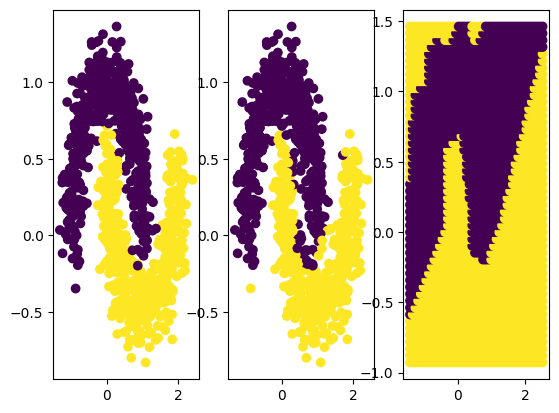

In [16]:
import numpy as np

def colors(ypred):
    return [sol(i) for i in ypred]

x0_min, x0_max = X1[:, 0].min() - 0.1, X1[:, 0].max() + 0.1
x1_min, x1_max = X1[:, 1].min() - 0.1, X1[:, 1].max() + 0.1

x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 50),
                     np.linspace(x1_min, x1_max, 50))

X2 = np.hstack((x0.reshape(-1, 1), x1.reshape(-1, 1)))
ypred2 = list(n(x) for x in X2)
fig, (ax, bx, cx) = plt.subplots(1, 3)
ax.scatter(X1[:, 0], X1[:, 1], c=ytrue1)
bx.scatter(X1[:, 0], X1[:, 1], c=colors(ypred1))
cx.scatter(X2[:, 0], X2[:, 1], c=colors(ypred2))